In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Input, Model 
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
# fashion mnist row = 1Image
#28x28 = 784 pixel images (greyscale)
#each pixel is assigned a greyscale value from 1 to 255
#10 possible labels


(xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.fashion_mnist.load_data()

print("xTrain shape = ", xTrain.shape, "yTrain shape = ", yTrain.shape)

xTrain shape =  (60000, 28, 28) yTrain shape =  (60000,)


xTrain shape =  (60000, 28, 28) yTrain shape =  (60000,)
60000 train set
10000 test set
y = 8 Bag


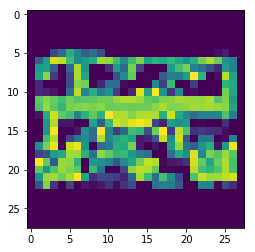

In [3]:
print("xTrain shape = ", xTrain.shape, "yTrain shape = ", yTrain.shape)
print(xTrain.shape[0], "train set")
print(xTest.shape[0], "test set")
labels = ["T-shirt/Top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneakers", "Bag", "Ankle boots"]

imgIndex = 10000
labelIndex = yTrain[imgIndex]
print("y = " + str(labelIndex) + " " + (labels[labelIndex]))
plt.imshow(xTrain[imgIndex])

In [4]:
xTrain = xTrain.astype('float32') / 255
xTest = xTest.astype('float32') / 255

(xTrain, xValid) = xTrain[5000:], xTrain[:5000]
(yTrain, yValid) = yTrain[5000:], yTrain[:5000]

w, h = 28, 28
xTrain = xTrain.reshape(xTrain.shape[0], w, h, 1)
xValid = xValid.reshape(xValid.shape[0], w, h, 1)
xTest =  xTest.reshape(xTest.shape[0], w, h, 1)

yTrain = tf.keras.utils.to_categorical(yTrain, 10)
yValid = tf.keras.utils.to_categorical(yValid, 10)
yTest = tf.keras.utils.to_categorical(yTest, 10)

print("xTrain shape = " , xTrain.shape, "yTrain shape = ", yTrain.shape)
print(xTrain.shape[0], "train set")
print(xValid.shape[0], 'validation set')
print(xTest.shape[0], 'test set')

xTrain shape =  (55000, 28, 28, 1) yTrain shape =  (55000, 10)
55000 train set
5000 validation set
10000 test set


In [8]:
input = tf.keras.Input(shape=(28, 28, 1 )) # sets "input" equal to a 2 dimensional placeholder tensor of shape (28x28x1)

a = layers.LeakyReLU(.3)(input)
a = layers.LeakyReLU(.1)(a)
a = layers.Dense(32)(a)
a = layers.LeakyReLU(.2)(a)
a = layers.Dense(32)(a)
a = layers.Dense(32)(a)
a = layers.Dropout(.4)(a)

# call layer instance on input tensor and set x equal to the resulting tensor
x = layers.Conv2D(filters=128, kernel_size=4, dilation_rate=1, activation='relu', padding='same')(input)
# print(x.shape)
x = layers.Dense(64, activation='relu')(x)
# print(x.shape)
x = layers.Conv2D(filters=64, kernel_size=4, dilation_rate=2, activation='relu', padding='same')(x)
# print(x.shape)
x = layers.Dense(32, activation='relu')(x)
# print(x.shape)
x = layers.Conv2D(filters=32, kernel_size=4, dilation_rate=2, activation='relu', padding='same')(x)
# print(x.shape)
x = layers.Dense(32, activation='relu')(x)
# print(x.shape)
# print(a.shape)
x = layers.Dropout(.4)(x)
x = layers.Dot(1)([x, a])#this should be tested in different locations (with a primary focus on closeness to output)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Flatten()(x)
output = layers.Dense(10, activation='softmax')(x)


In [25]:
model = tf.keras.Model(inputs=input, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(xTrain,
         yTrain,
         batch_size=50,
         epochs=5,
         validation_data=(xValid, yValid),
          callbacks=[checkpoint])